In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import glob
import os, sys

In [22]:
file_date = "2019-09-21-125539-1-0"

In [24]:
print(os.getcwd())

Agent_1_interaction_data_files = glob.glob("../SHARCNET/Results/debug/ddpg/300_300_NN/point75/PLA/" + file_date + "/log/*.csv")
Agent_1_interaction_data_files.sort()
Agent_1_interaction_data_files

F:\unity_simulator\unity_simulator\notebook


['../SHARCNET/Results/debug/ddpg/300_300_NN/point75/PLA/2019-09-21-125539-1-0/log\\2019-09-21.csv']

In [25]:
Agent_1_interaction_data = {}
for file in Agent_1_interaction_data_files:
    Agent_1_interaction_data[file] = pd.read_csv(file, header=None)
    Agent_1_interaction_data[file].columns = ['Time','Observation','Action','Reward']
    def convert_str_to_matrix(data):
        # remove '\r\n', '[', ']', then split with ' '
        temp_list = data.replace('\n', '').replace('[','').replace(']','').split(' ')
        return np.array([float(item) for item in temp_list if item != ''])
    Agent_1_interaction_data[file]['Observation'] = Agent_1_interaction_data[file]['Observation'].apply(convert_str_to_matrix)
    Agent_1_interaction_data[file]['Action'] = Agent_1_interaction_data[file]['Action'].apply(convert_str_to_matrix)
    print(Agent_1_interaction_data[file].shape)

(25000, 4)


In [26]:
Agent_1_interaction_data_all = {}
Agent_1_interaction_data_all['data'] = pd.DataFrame()
Agent_1_interaction_data_all['separate_line'] = []
Agent_1_interaction_data_all['date'] = []
for key in Agent_1_interaction_data.keys():
    Agent_1_interaction_data_all['data'] = pd.concat([Agent_1_interaction_data_all['data'], Agent_1_interaction_data[key]])
    Agent_1_interaction_data_all['separate_line'].append(len(Agent_1_interaction_data[key]))
    Agent_1_interaction_data_all['date'].append(key.split('/')[2].split('-')[0])

In [27]:

# Convert action into np.array
Agent_1_action = np.array(Agent_1_interaction_data_all['data']['Action'].tolist())
# read action_space_name
action_space_name = pd.read_csv('action_space_name_pla.csv')

Agent_1_action_df = pd.DataFrame(Agent_1_action, columns = action_space_name['actuator_name'])
Agent_1_action_df.shape

(25000, 11)

In [28]:
Agent_1_action_df

actuator_name,led_ru,led_ho,led_rd,moth_ru,moth_ho,moth_rd,I_max,ml_gap,sma_gap,n_gap,t_sma
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-0.999059,0.811485,-0.748585,0.885848,-1.000000,-0.698144,0.614781,0.905531,0.169775,-0.999256,0.999589
2,-0.999059,0.811485,-0.748585,0.885848,-1.000000,-0.698144,0.614781,0.905531,0.169775,-0.999256,0.999589
3,-0.999059,0.811485,-0.748585,0.885848,-1.000000,-0.698144,0.614781,0.905531,0.169775,-0.999256,0.999589
4,-0.999059,0.811485,-0.748585,0.885848,-1.000000,-0.698144,0.614781,0.905531,0.169775,-0.999256,0.999589
5,-0.999558,0.732423,-0.720514,0.883933,-1.000000,-0.736634,0.920798,0.887794,-0.445555,-0.999376,0.999793
6,-0.989791,0.767686,-0.907134,0.965650,-1.000000,-0.929784,0.655750,0.886402,0.331927,-0.997992,0.999838
7,-0.999059,0.811485,-0.748585,0.885848,-1.000000,-0.698144,0.614781,0.905531,0.169775,-0.999256,0.999589
8,-0.999059,0.811485,-0.748585,0.885848,-1.000000,-0.698144,0.614781,0.905531,0.169775,-0.999256,0.999589
9,-0.999059,0.811485,-0.748585,0.885848,-1.000000,-0.698144,0.614781,0.905531,0.169775,-0.999256,0.999589


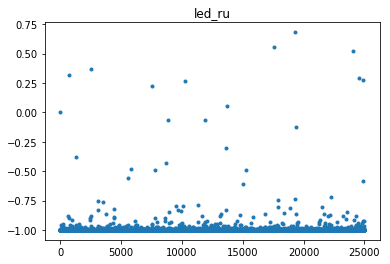

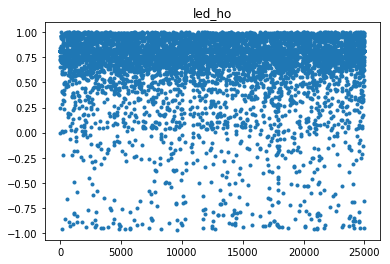

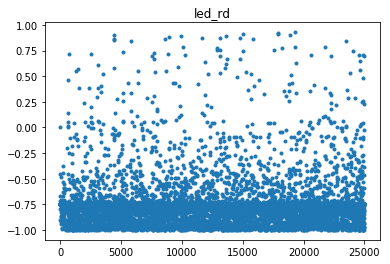

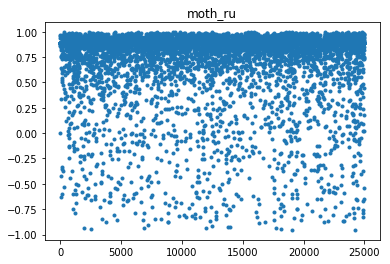

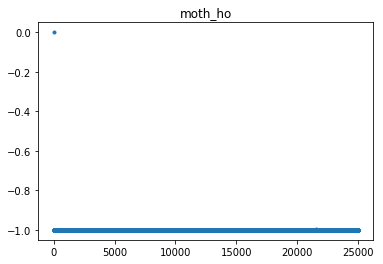

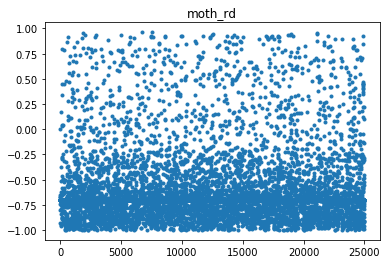

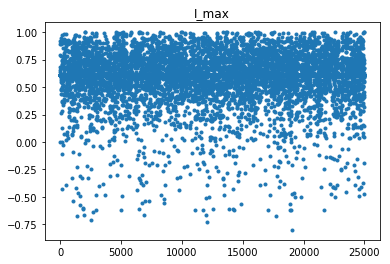

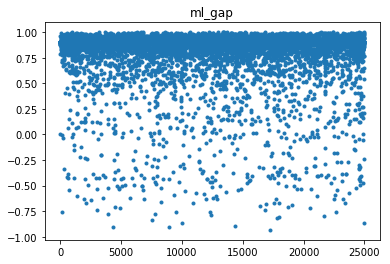

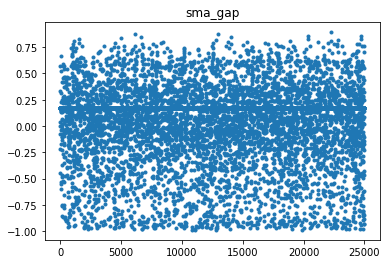

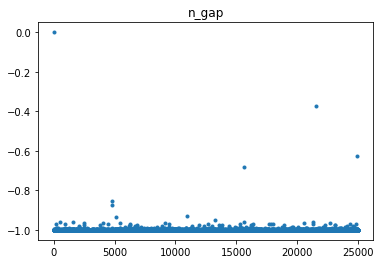

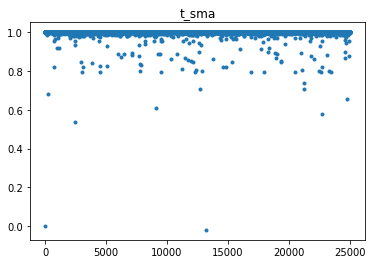

In [29]:
for col in Agent_1_action_df.columns:
    plt.figure()
    plt.plot(Agent_1_action_df.index, Agent_1_action_df[col],'.')
    plt.title(col)
    

In [40]:
Agent_1_action_df.index

RangeIndex(start=0, stop=200000, step=1)

## Visitor's location

In [14]:
import re
# Process log
visitor_log_file = glob.glob("../SHARCNET/Results/PLA_LED_2000epoch/"+file_date+"/*.out")
print(visitor_log_file)
for log_file in visitor_log_file:
    f_in = open(log_file, "r")

f_out = open("../SHARCNET/Results/PLA_LED_2000epoch/" + file_date +"/visitor_log.csv","w")
cnt = 0
# skip lines in the header
for _ in range(300):
    line = f_in.readline()
    if 'Loading' in line:
        cnt += 1
    if cnt >= 25:
        break;
        
# save into CSV
f_out.write("Time,Location_x,Location_y,Location_z,Destination_x,Destination_y,Destination_z,Distance,Speed\n")
for line in f_in:
    if line.strip():
        # not empty line    
        x = re.search("^\d+(\.\d{1,2})", line)
        if x is not None:
            f_out.write(line.replace('(','').replace(')',''))
        
f_in.close()
f_out.close()

['../SHARCNET/Results/PLA_LED_2000epoch/2019-07-22-202852\\s_single_PLA17566171.out']


In [3]:
visitor_data = pd.read_csv("../SHARCNET/Results/PLA_LED_2000epoch/" + file_date + "/visitor_log.csv", sep=',')


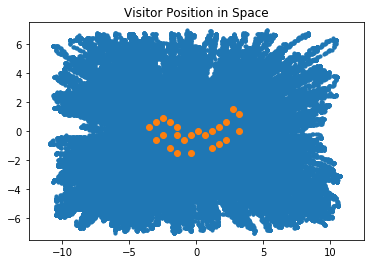

In [6]:
nodes_position = pd.read_csv("NodePosition.csv")

plt.scatter(visitor_data['Location_x'], visitor_data['Location_z'],s=10)
plt.xlim([-12.5,12.5])
plt.ylim([-7.5,7.5])
plt.title("Visitor Position in Space")
plt.scatter(nodes_position['x'], nodes_position['z'])

In [9]:
resolution = (10,10)
bins_x = np.linspace(-12.5,12.5,resolution[0]+1)
bins_z = np.linspace(-7.5,7.5,resolution[1]+1)
x_discretized = pd.cut(visitor_data['Location_x'],bins=bins_x,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))
z_discretized = pd.cut(visitor_data['Location_z'],bins=bins_z,labels=np.linspace(0,resolution[0]-1,resolution[0],dtype=np.int32))

In [10]:
activity_map = np.zeros(resolution)
for i in range(len(x_discretized)):
    position = (x_discretized[i],z_discretized[i])
    activity_map[position] += 1

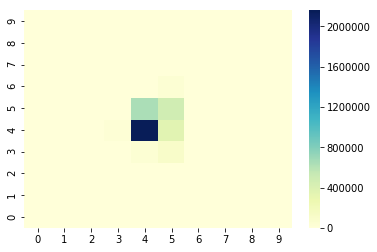

In [11]:
import seaborn

ax = seaborn.heatmap(activity_map, cmap="YlGnBu")
ax.invert_yaxis()

### Moving Distance

In [4]:
# movements in vector
visitor_data['Movement_x'] = visitor_data['Location_x'].diff()
visitor_data['Movement_z'] = visitor_data['Location_z'].diff()

import math
movement_length = []
for idx, row in visitor_data.iterrows():
    x = row['Movement_x']
    z = row['Movement_z']
    d = math.sqrt(z*z+x*x)
    movement_length.append(d)

In [5]:
visitor_data['Movement_length'] = movement_length

Text(0.5, 1.0, 'PLA: Movement')

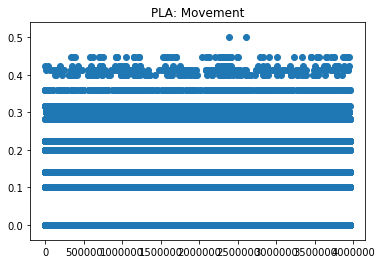

In [14]:
# plot
plt.scatter(visitor_data.index[1:], visitor_data['Movement_length'][1:])
plt.title("PLA: Movement")

In [6]:
total_length = visitor_data['Movement_length'][1:].copy().values # copy() is important!
for i in range(1,len(total_length)):
    total_length[i] = total_length[i] + total_length[i-1]

Text(0.5, 0, 'Step')

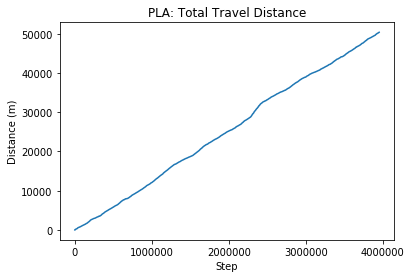

In [7]:
plt.plot(np.linspace(1,len(total_length),len(total_length)), total_length)
plt.locator_params(nbins=5, axis='x')
plt.title("PLA: Total Travel Distance")
plt.ylabel('Distance (m)')
plt.xlabel('Step')

In [25]:
total_length_pla = total_length
%store total_length_pla

Stored 'total_length_pla' (ndarray)


### Destination changes

In [8]:
dest_change_x = [False]
for i in range(1,visitor_data.shape[0]):
    dest_change_x.append(visitor_data.iloc[i]["Destination_x"] != visitor_data.iloc[i-1]["Destination_x"])

In [9]:
dest_change = dest_change_x
for i in range(1, visitor_data.shape[0]):
    if dest_change_x[i]:
        dest_change[i] = visitor_data.iloc[i]["Destination_z"] != visitor_data.iloc[i-1]["Destination_z"]

In [10]:
total_dest_change = dest_change.copy()
total_dest_change[0] = 0
for i in range(1,len(total_dest_change)):
    total_dest_change[i] = total_dest_change[i] + total_dest_change[i-1]

Text(0.5, 0, 'Step')

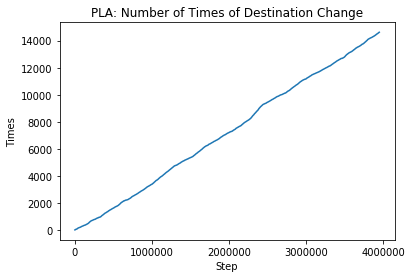

In [11]:
plt.plot(total_dest_change)
plt.locator_params(nbins=5, axis='x')
plt.title("PLA: Number of Times of Destination Change")
plt.ylabel('Times')
plt.xlabel('Step')

In [14]:
visitor_data["Total_dest_change"] = total_dest_change
visitor_data.to_csv("visitor_data_PLA_"+file_date+".csv")

In [15]:
visitor_data.columns

Index(['Time', 'Location_x', 'Location_y', 'Location_z', 'Destination_x',
       'Destination_y', 'Destination_z', 'Distance', 'Speed', 'Movement_x',
       'Movement_z', 'Movement_length', 'Total_dest_change'],
      dtype='object')

In [72]:
import matplotlib.patches as patches
import matplotlib as mpl

def plot_scene():
    nodes_position = pd.read_csv("NodePosition.csv")
    fig = plt.figure(figsize=(12.5,7.5))
    ax = fig.add_subplot(111)
    
    ir_coverages = []
    for i in range(nodes_position.shape[0]):
        ir = patches.Rectangle((-0.5,0), 1, 2, color="red",  alpha=0.50)
        T = mpl.transforms.Affine2D().rotate_deg(-180+(360-nodes_position.iloc[i]['angle'])) + mpl.transforms.Affine2D().translate(nodes_position.iloc[i]['x'], nodes_position.iloc[i]['z']) + ax.transData
        ir.set_transform(T)
        ax.add_patch(ir)
    plt.scatter(nodes_position['x'], nodes_position['z'])
    plt.grid(True)
    plt.ylim(-7.5, 7.5)
    plt.xlim(-12.5,12.5)
    return fig, ax
#     plt.scatter(nodes_position['x'], nodes_position['z'])


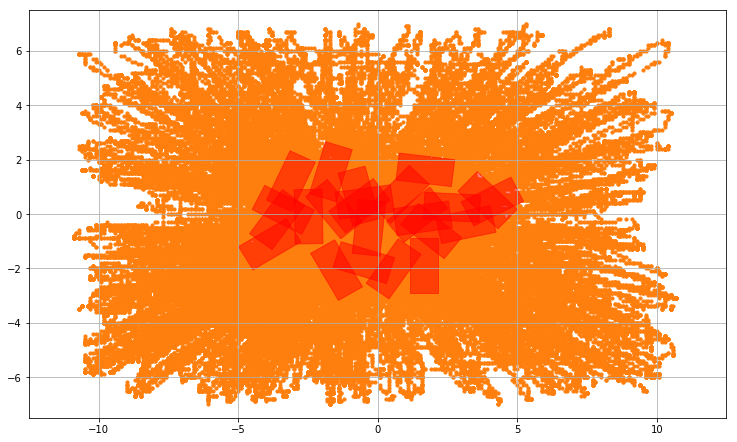

In [74]:
fig, ax = plot_scene()
plt.scatter(visitor_data['Location_x'], visitor_data['Location_z'],s=10)